In [2]:
import numpy as np
from loss import *
from utils import *
import skopt
from matplotlib import pyplot as plt
from skopt import gp_minimize
import pandas as pd

In [3]:
# let see how the increasing number of evaluations approximates the true distribution
objective = LossPois()

true_distribution = sample(lambda : objective(np.array([1,2])), size=1000)

sizes = [0, 10, 40, 150, 500, 500, 1000]
approximate_distribution = np.zeros((len(sizes), len(true_distribution)))

for i in range(len(sizes)):
    for _ in range(sizes[i]):
        objective(np.array([1,2]), sample_share=0.3, update_weights=True)
        
    approximate_distribution[i] = sample(lambda : objective(np.array([1,2]), sample_share=0.3),  size=len(true_distribution))

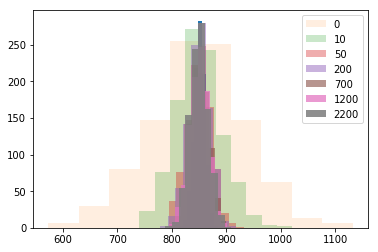

In [4]:
plt.hist(true_distribution)


history_size = np.cumsum(sizes)
for i in range(0, len(approximate_distribution)):
    row = approximate_distribution[i]
    plt.hist(row[row < 3000], alpha= (i + 1) / 8, label='{}'.format(history_size[i]))
plt.legend()
plt.show();

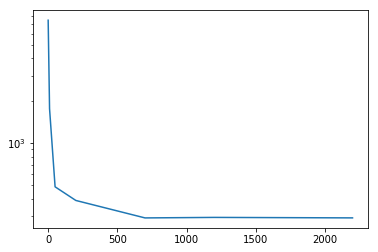

In [5]:
plt.plot(history_size,np.var(approximate_distribution, axis=1))
plt.yscale('log')
plt.show()

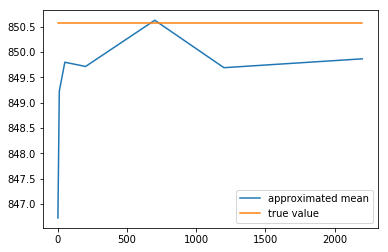

In [6]:
plt.plot(history_size, np.mean(approximate_distribution, axis =1), label='approximated mean')
plt.plot(np.array([0, 2200]), [np.mean(true_distribution), np.mean(true_distribution)], '-', label='true value')
plt.legend()
plt.show()

Let see what will happen with the random initialization of the feature vector (simulation optimization process).

In [7]:
# let see how the increasing number of evaluations approximates the true distribution
objective = LossPois()

true_distribution = sample(lambda : objective(np.array([1,2])), size=1000)

sizes = [0, 10, 40, 150, 500, 500, 1000]
approximate_distribution = np.zeros((len(sizes), len(true_distribution)))

for i in range(len(sizes)):
    for _ in range(sizes[i]):
        objective(np.random.uniform(1, 5, size=2), sample_share=0.3, update_weights=True)
        
    approximate_distribution[i] = sample(lambda : objective(np.array([1,2]), sample_share=0.3),  size=len(true_distribution))
    

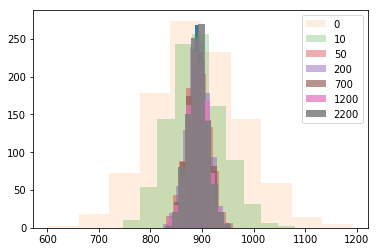

In [8]:
plt.hist(true_distribution)


history_size = np.cumsum(sizes)
for i in range(0, len(approximate_distribution)):
    row = approximate_distribution[i]
    plt.hist(row[row < 3000], alpha= (i + 1) / 8, label='{}'.format(history_size[i]))
plt.legend()
plt.show();